# Room Occupancy Detection

The aim of this project is to predict whether a room is occupied or not based on the data collected from the sensors. The data set is collected from the UCI Machine Learning Repository. The data set contains 7 attributes. The attributes are date, temperature, humidity, light, CO2, humidity ratio and occupancy. The data set is divided into 3 data sets for training and testing. The data set provides experimental data used for binary classification (room occupancy of an office room) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

##### Data Dictionary





| Column   Position 	| Atrribute Name 	| Definition                                                                                           	| Data Type    	| Example                                        	| % Null Ratios 	|
|-------------------|----------------|---------------------------------------|--------------|------------------------------------------------|---------------|
| 1                 	| Date           	| Date & time in year-month-day hour:minute:second format                                              	| Qualitative  	| 2/4/2015 17:57, 2/4/2015 17:55, 2/4/2015 18:06		 	| 0             	|
| 2                 	| Temperature    	| Temperature in degree Celcius                                                                        	| Quantitative 	| 23.150, 23.075, 22.890                         	| 0             	|
| 3                 	| Humidity       	| Relative humidity in percentage                                                                      	| Quantitative 	| 27.272000, 27.200000, 27.390000                	| 0             	|
| 4                 	| Light          	| Illuminance measurement in unit Lux                                                                  	| Quantitative 	| 426.0, 419.0, 0.0	                              	| 0             	|
| 5                 	| CO2            	| CO2 in parts per million (ppm)                                                                       	| Quantitative 	| 489.666667,   495.500000, 534.500000           	| 0             	|
| 6                 	| HumidityRatio  	| Humadity ratio:  Derived quantity from temperature and   relative humidity, in kgwater-vapor/kg-air  	| Quantitative 	| 0.004986, 0.005088, 0.005203                   	| 0             	|
| 7                 	| Occupancy      	| Occupied or not: 1 for occupied and 0 for not occupied                                               	| Quantitative 	| 1, 0                                           	| 0             	|


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading the three datasets and combining them into one dataset for easier cleaning

In [2]:
#loading the datasets
df1 = pd.read_csv('datatest.csv')
df2 = pd.read_csv('datatraining.csv')
df3 = pd.read_csv("datatest2.csv")

In [3]:
# shape of each dataset
print(f" The shape of df1 is {df1.shape}")
print(f" The shape of df1 is {df2.shape}")
print(f" The shape of df1 is {df3.shape}")

 The shape of df1 is (2665, 7)
 The shape of df1 is (8143, 7)
 The shape of df1 is (9752, 7)


In [4]:
#combining the datasets
df_train = pd.concat([df1,df2])
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
# creating an extra column that will form the basis of separating the test and train data
df_train["training"] = 1
df3["training"] = 0

In [6]:
# loading all the dataset
df = pd.concat([df_train,df3])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,training
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1,1


In [7]:
df.training.value_counts()

1    10808
0     9752
Name: training, dtype: int64

## Data Preprocessing

In [8]:
#number of rows and columns
df.shape

(20560, 8)

In [9]:
#checking for null values
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
training         0
dtype: int64

In [10]:
#checking for duplicate values
df.duplicated().sum()

54

In [11]:
#removing the duplicate values
df.drop_duplicates(inplace=True)

In [12]:
#checking data types
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
training           int64
dtype: object

In [13]:
#converting the date and time to datetime format
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
training                  int64
dtype: object

In [15]:
#checking the descriptive statistics
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,training
count,20506.000000,20506.000000,20506.000000,20506.000000,20506.000000,20506.00000,20506.000000
mean,20.908030,27.652599,131.096613,690.785154,0.004228,0.23164,0.525749
std,1.055636,4.980553,210.603057,311.229361,0.000768,0.42189,0.499349
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.00000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.00000,0.000000
50%,20.700000,27.290000,0.000000,565.666667,0.004291,0.00000,1.000000
75%,21.525000,31.290000,304.375000,805.000000,0.004831,0.00000,1.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.00000,1.000000


In [16]:
#value counts for the target variable i.e. occupancy
df['Occupancy'].value_counts()*100/len(df["Occupancy"])

0    76.836048
1    23.163952
Name: Occupancy, dtype: float64

In [17]:
# Extract time and date components
df['time'] = df['date'].dt.time
df['date_n'] = df['date'].dt.date

# Extract day of the week and create a new day column
df['Day'] = df['date_n'].apply(lambda x: x.strftime('%A'))

# Extract day of the month and create a new date column
df['Day_number'] = df['date_n'].apply(lambda x: x.day)

# Convert time to total seconds since midnight
df['time_seconds'] = df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

bin_edges = [0,6*3600,12*3600,18*3600,24*3600]
bin_labels = ["Night", "Morning", "Afternoon","Eveining"]
df["Time_category"] = pd.cut(df["time_seconds"], bins = bin_edges, labels = bin_labels, right = False)

In [18]:
# dropping the unwanted colunms
df.drop(["time","time_seconds", "date_n"], axis = 1, inplace= True)

In [19]:
# getting the columns arrangements
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'training', 'Day', 'Day_number', 'Time_category'],
      dtype='object')

In [20]:
# Rearranging the columns of teh dataset
new_column = ['date','Day_number', 'Day','Time_category', 'Temperature', 'Humidity',
       'Light', 'CO2', 'HumidityRatio', 'Occupancy', 'training']

df = df[new_column]

In [21]:
df.head()

,date,Day_number,Day,Time_category,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,training
0,2015-02-02 14:19:00,2,Monday,Afternoon,23.7000,26.272,585.200000,749.200000,0.004764,1,1
1,2015-02-02 14:19:00,2,Monday,Afternoon,23.7180,26.290,578.400000,760.400000,0.004773,1,1
2,2015-02-02 14:21:00,2,Monday,Afternoon,23.7300,26.230,572.666667,769.666667,0.004765,1,1
3,2015-02-02 14:22:00,2,Monday,Afternoon,23.7225,26.125,493.750000,774.750000,0.004744,1,1
4,2015-02-02 14:23:00,2,Monday,Afternoon,23.7540,26.200,488.600000,779.000000,0.004767,1,1


In [22]:
df.Day_number.value_counts()

12    1440
13    1438
3     1438
6     1438
16    1437
17    1437
8     1437
5     1437
7     1435
9     1434
15    1433
14    1432
4     1010
2      581
10     571
18     556
11     552
Name: Day_number, dtype: int64

### Exploratory Analysis

In [23]:
df["Time_category"].value_counts()

Eveining     5388
Night        5374
Morning      5006
Afternoon    4738
Name: Time_category, dtype: int64

In [24]:
pd.crosstab(df["Occupancy"], df["Time_category"])

Time_category,Night,Morning,Afternoon,Eveining
Occupancy,,,,
0,5374,3135,1943,5304
1,0,1871,2795,84


In [25]:
pd.crosstab(df["Day"], df["Occupancy"])

Occupancy,0,1
Day,,
Friday,1796,1080
Monday,2164,1288
Saturday,2867,0
Sunday,2870,0
Thursday,2094,783
Tuesday,2256,1190
Wednesday,1709,409


In [26]:
pd.crosstab([df["Day_number"],df["Day"]], df["Occupancy"])

,Occupancy,0,1
Day_number,Day,,
2,Monday,378,203
3,Tuesday,839,599
4,Wednesday,824,186
5,Thursday,898,539
6,Friday,852,586
7,Saturday,1435,0
8,Sunday,1437,0
9,Monday,900,534
10,Tuesday,517,54


In [27]:
pd.crosstab([df["Occupancy"], df["Time_category"]], df["Day"])

Day                      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
Occupancy Time_category                                                        
0         Night             720     715       715     713       718     1076   
          Morning           295     336       720     718       341      421   
          Afternoon          76      49       717     719       320       59   
          Eveining          705    1064       715     720       715      700   
1         Morning           423     381         0       0       378      510   
          Afternoon         644     892         0       0       400      661   
          Eveining           13      15         0       0         5       19   

Day                      Wednesday  
Occupancy Time_category             
0         Night                717  
          Morning              304  
          Afternoon              3  
          Eveining             685  
1         Morning              179  
          Afternoon            198  
          Eveining              32

In the exploratory data analysis, we will be looking at the distribution of the data, along with the time series of the data. We will also be looking at the correlation between the variables.

#### Visualizing the temperture fluctuations over time

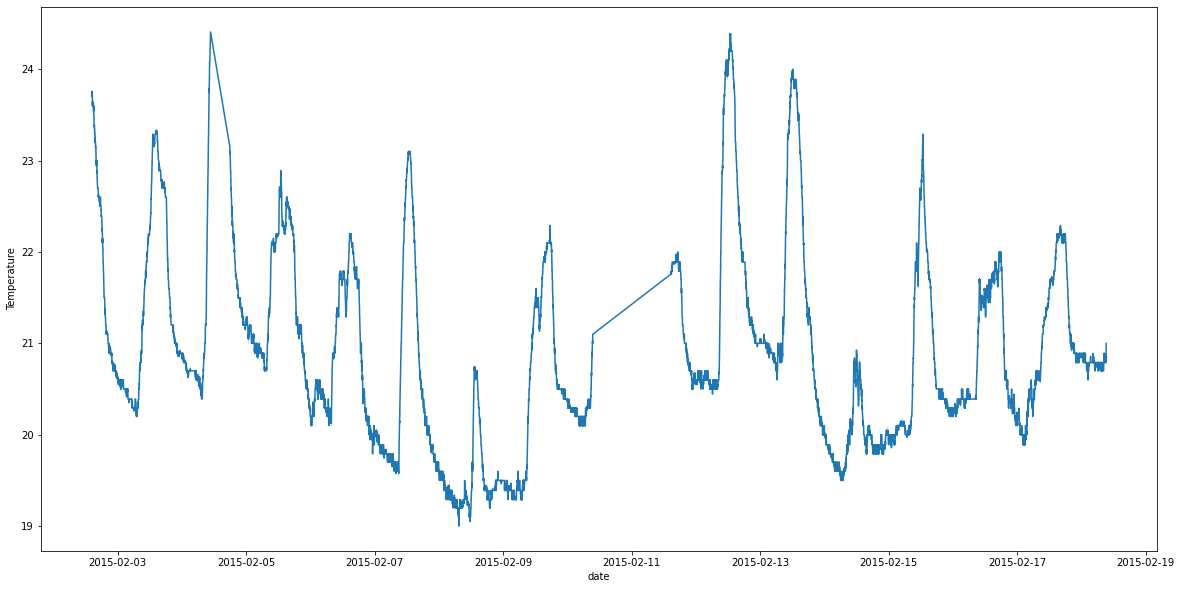

In [28]:
#lineplot for themperature changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Temperature',data=df)
plt.show()

The spikes in the graph clearly indicates that the room temperature incresases suddenly which might be due to the presence of people in the room. The temperature of the room may increase due to the heat emitted by the human body.

#### Visualizing the humidity fluctuations over time

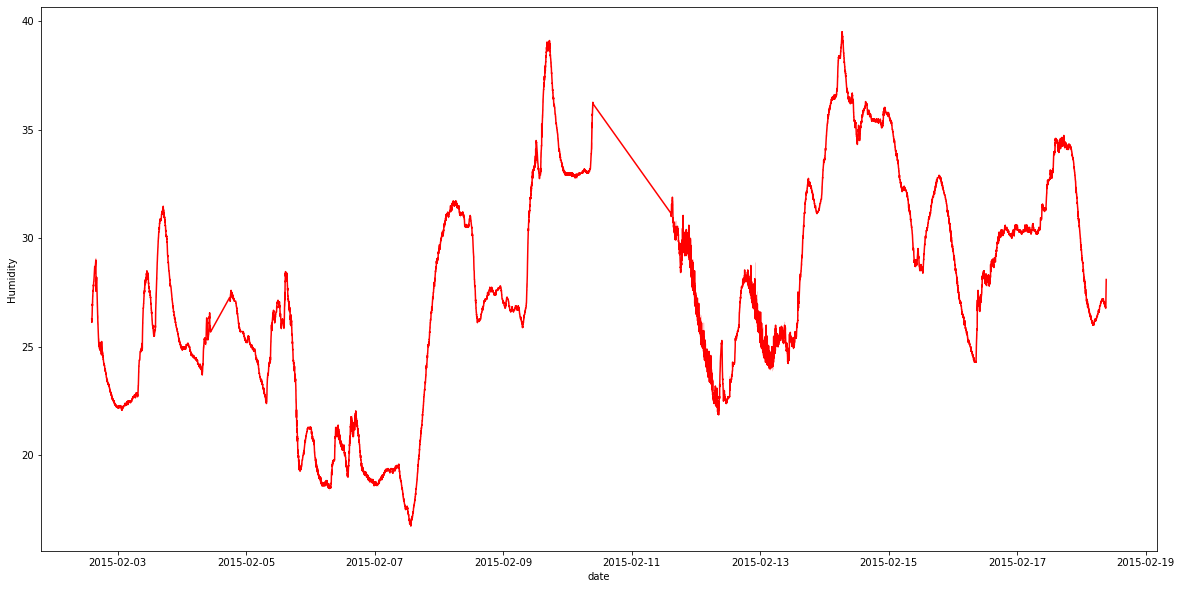

In [29]:
#lineplot for humidity changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Humidity',data=df, color='r')
plt.show()

The line graph between 3rd of February to 6th of February shows some similarity with the temperature graph, which might be due to the presence of people in the room. However 7th of February onwards there has been a significant rise in the humidity levels which might be due to cleaning of the room, or change in the weather conditions. Out of which room cleaning such sweeping the floor might be the reason for the sudden rise in the humidity levels. But it couldn't explain the increase in the humidity levels near 10th of February.

#### Visualizing the light fluctuations over time

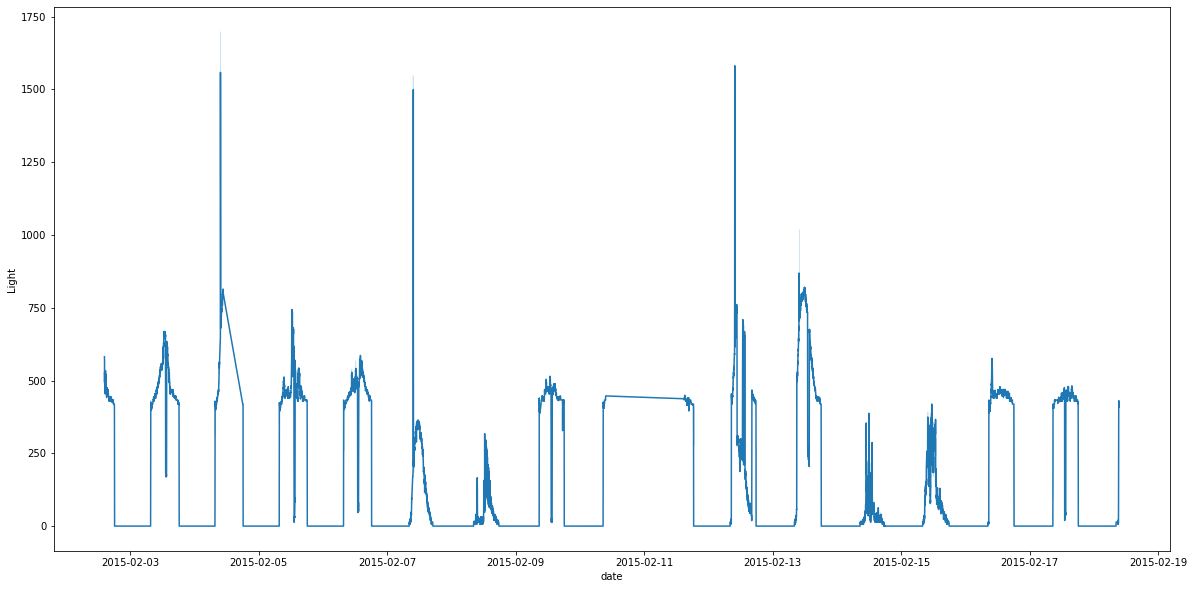

In [30]:
#lineplot for light changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Light',data=df)
plt.show()

If we look closely, we can see that the number of peaks in this graph and in the temperature graph are same. This indicates that lights were turned on when there was a person in the room. This is a good indicator of the occupancy of the room.

##### Visualizing the CO2 fluctuations over time

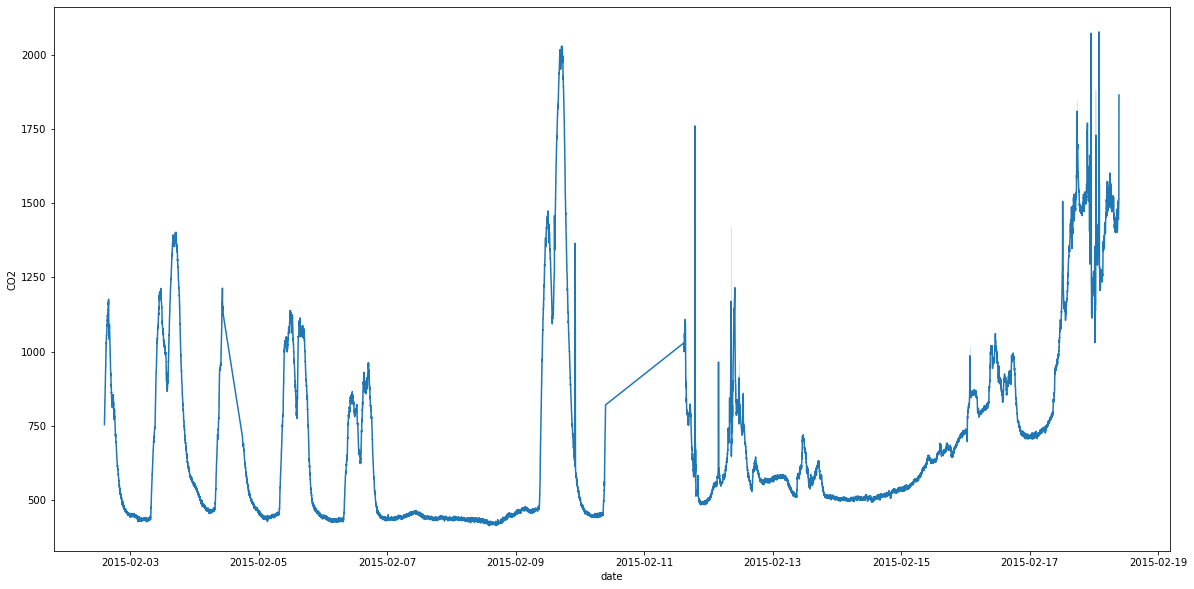

In [31]:
#lineplot for co2 changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='CO2',data=df)
plt.show()

The co2 graph also shows the spikes in the co2 levels which indicates the presence of person in the room, assuming that there is no other source of co2 in the room.In addition to that the spikes also shows correspondence with the temperature graph and light graph. However from 7th of February to 9th of February, the co2 levels where minimum, which indicstes that the room was not occupied during that time. This observation contradicts with the humidity graph and temperature graph.

#### Visualizing the humidity ratio fluctuations over time

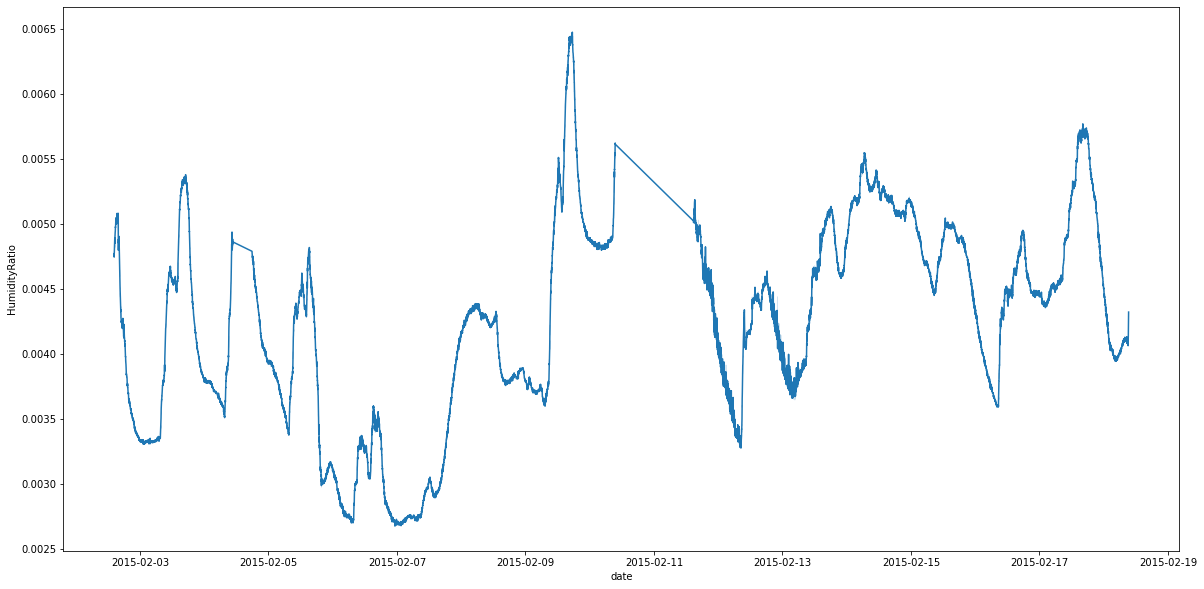

In [32]:
#lineplot for humidity ratio changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='HumidityRatio',data=df)
plt.show()

The humidity ratio graph is quite similar to the humidity graph. The spikes in the graph indicates the presence of people in the room. Moreover the same assumption is made about the humidity ratio after 9th of February.

## Correlation between the variables

### Correlation Heatmap

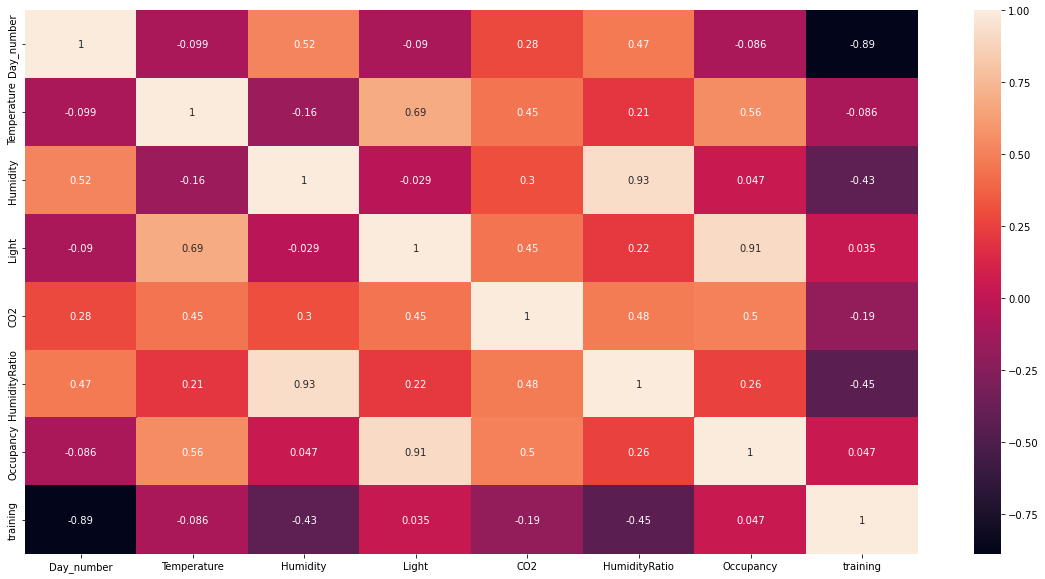

In [33]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is a strong coorelation between light and occupancy as well as between humidity and humidity ratio. The co2 levels and temperature also shows a strong correlation with the occupancy. However the humidity and humidity ratio has very less correlation with the occupancy.

#### Temperature and Occupancy

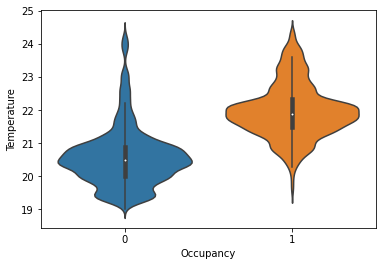

In [34]:
#violinplot for temperature
sns.violinplot(y = df['Temperature'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Temperature')
plt.show()

The temperature and occupancy graph shows that the temperature of the room increases when there is a person in the room. This is because of the heat emitted by the human body. The temperature of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the temperature graph.

#### Light and Occupancy

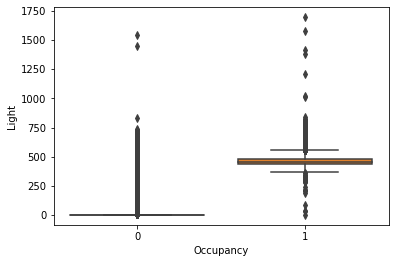

In [35]:
#boxplot for light
sns.boxplot(y = df['Light'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()

The light intensity of the room increases when there is a person in the room. This is because the lights are turned on when there is a person in the room. The light intensity of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the light graph. The outliers in the boxplot and the curves in the ligh graph might be due to sunlight entering the room.

#### CO2 and Occupancy

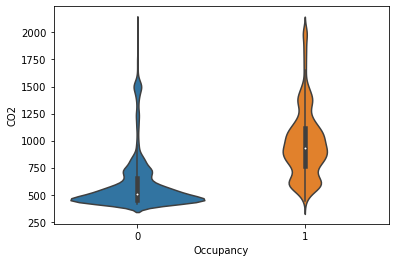

In [36]:
#violinlot for co2
sns.violinplot(y = df['CO2'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('CO2')
plt.show()

The CO2 levels of the room increases when there is a person in the room. This is because of the CO2 emitted by the human body. The CO2 levels of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the CO2 graph.

From the above EDA, it is quite clear that the temperature, light and CO2 levels of the room are a good indicator of the occupancy of the room. Therefore we will be using these three variables for our classification model.

## Data Preprocessing 2

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through categorical columns and label encode
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df.head()

,date,Day_number,Day,Time_category,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,training
0,2015-02-02 14:19:00,2,1,0,23.7000,26.272,585.200000,749.200000,0.004764,1,1
1,2015-02-02 14:19:00,2,1,0,23.7180,26.290,578.400000,760.400000,0.004773,1,1
2,2015-02-02 14:21:00,2,1,0,23.7300,26.230,572.666667,769.666667,0.004765,1,1
3,2015-02-02 14:22:00,2,1,0,23.7225,26.125,493.750000,774.750000,0.004744,1,1
4,2015-02-02 14:23:00,2,1,0,23.7540,26.200,488.600000,779.000000,0.004767,1,1


### Removing Multicollinearity

In [39]:
df1 = df.drop("date", axis =1)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20506 entries, 0 to 9751
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day_number     20506 non-null  int64  
 1   Day            20506 non-null  int32  
 2   Time_category  20506 non-null  int32  
 3   Temperature    20506 non-null  float64
 4   Humidity       20506 non-null  float64
 5   Light          20506 non-null  float64
 6   CO2            20506 non-null  float64
 7   HumidityRatio  20506 non-null  float64
 8   Occupancy      20506 non-null  int64  
 9   training       20506 non-null  int64  
dtypes: float64(5), int32(2), int64(3)
memory usage: 2.1 MB


In [41]:
# importing the multicolinearity libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function for tabulating the score of multicolinearity of aeach column in descending order
def calc_vif(x):
    vif=pd.DataFrame()
    vif['column']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    # Sort the DataFrame by 'vif' column in descending order
    vif = vif.sort_values(by='vif', ascending=False)
    return vif

# function to iterate the drop in the columns with the highest variance enflation factor score 
# iterates the conditional loop untill the highest vif score is less or equal to 5 and outputs the resulting data

def drop_high_vif_columns(df, threshold=5):
    while True:
        vif_result = calc_vif(df)
        highest_vif_column = vif_result.iloc[0]['column']
        highest_vif_value = vif_result.iloc[0]['vif']
        
        if highest_vif_value > threshold:
            print(f"Dropping column '{highest_vif_column}' with VIF {highest_vif_value:.2f}")
            df = df.drop(columns=highest_vif_column)
        else:
            print("VIF condition satisfied. Stopping the process.")
            break

    return df

clean_df = drop_high_vif_columns(df1)

calc_vif(clean_df)

Dropping column 'HumidityRatio' with VIF 1247.34
Dropping column 'Temperature' with VIF 60.44
Dropping column 'Humidity' with VIF 35.89
Dropping column 'CO2' with VIF 10.95
Dropping column 'Light' with VIF 8.58
VIF condition satisfied. Stopping the process.


,column,vif
0,Day_number,3.566127
2,Time_category,3.425071
1,Day,2.965037
4,training,2.120554
3,Occupancy,1.450052


In [42]:
#dropping columns humidity, date and humidity ratio
df.drop(['date', 'Day_number', 'Humidity','HumidityRatio'],axis=1,inplace=True)

In [43]:
df.dtypes

Day                int32
Time_category      int32
Temperature      float64
Light            float64
CO2              float64
Occupancy          int64
training           int64
dtype: object

### spliting the data set to training data and testing data

In [44]:
# Training Data
df_traind = df[df['training'] == 1].drop("training", axis = 1)

df_traind.head()

,Day,Time_category,Temperature,Light,CO2,Occupancy
0,1,0,23.7000,585.200000,749.200000,1
1,1,0,23.7180,578.400000,760.400000,1
2,1,0,23.7300,572.666667,769.666667,1
3,1,0,23.7225,493.750000,774.750000,1
4,1,0,23.7540,488.600000,779.000000,1


In [45]:
# Testing Data
df_test =  df[df['training'] == 0].drop("training", axis = 1)

df_test.head()

,Day,Time_category,Temperature,Light,CO2,Occupancy
0,6,0,21.7600,437.333333,1029.666667,1
1,6,0,21.7900,437.333333,1000.000000,1
2,6,0,21.7675,434.000000,1003.750000,1
3,6,0,21.7675,439.000000,1009.500000,1
4,6,0,21.7900,437.333333,1005.666667,1


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_traind.drop(['Occupancy'],axis=1),df_traind['Occupancy'],test_size=0.2,random_state=42)

## Model Building

### Random Tree Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#training the model
rfc.fit(x_train,y_train)
#training accuracy
rfc.score(x_train,y_train)

1.0

## Model Evaluation

In [48]:
rfc_pred = rfc.predict(x_test)

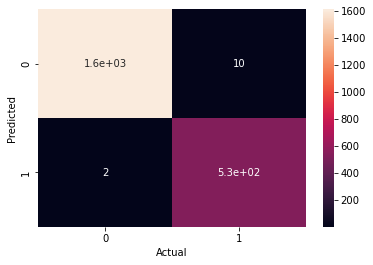

In [49]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

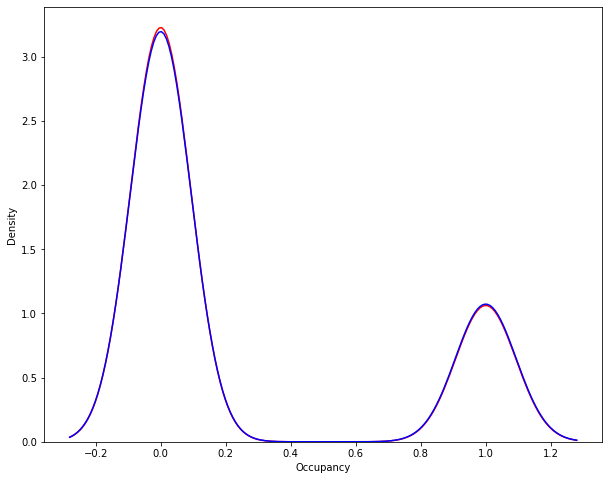

In [50]:
#distribution plot for the predicted and actual values
plt.figure(figsize = (10,8))
ax = sns.distplot(y_test,hist=False,label='Actual', color='r')
sns.distplot(rfc_pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1623
           1       0.98      1.00      0.99       534

    accuracy                           0.99      2157
   macro avg       0.99      1.00      0.99      2157
weighted avg       0.99      0.99      0.99      2157



## Testing the model on new dataset

In [52]:
#splitting the target variable
x = df_test.drop(['Occupancy'],axis=1)
y = df_test['Occupancy']

In [53]:
#predicting the values
pred = rfc.predict(x)

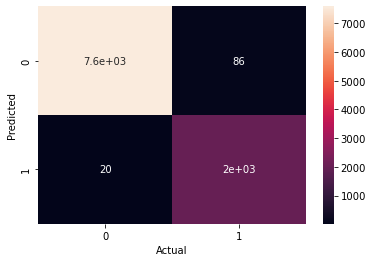

In [54]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y,pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

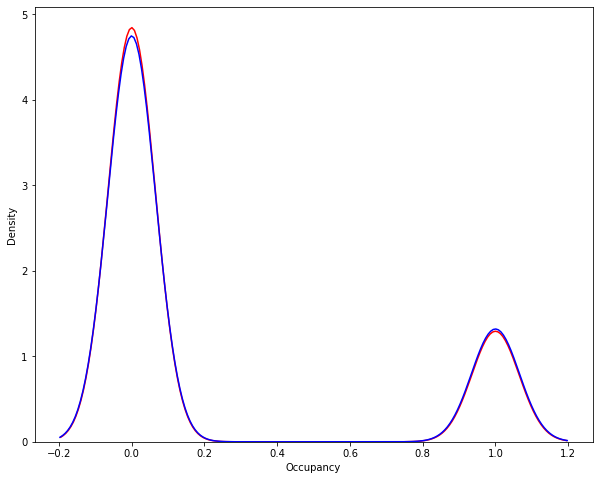

In [55]:
#distribution plot for the predicted and actual values
plt.figure(figsize = (10,8))
ax = sns.distplot(y,hist=False,label='Actual', color='r')
sns.distplot(pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [56]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7676
           1       0.96      0.99      0.97      2049

    accuracy                           0.99      9725
   macro avg       0.98      0.99      0.98      9725
weighted avg       0.99      0.99      0.99      9725



## Conclusion

From the above models we can see that the Random Forest Classifier has the highest accuracy score of 98%. Therefore we will be using the Random Forest Classifier for our final model.
I also conclude that from the exploratory data analysis, it was found that the change in room temperature, CO levels and light intensity can be used to predict the occupancy of the room, inplace of humidity and humidity ratio.